<a href="https://colab.research.google.com/github/logicalschema/data620/blob/main/Week6/Sung_Lee_Week_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sung Lee Week 6 Assignment

This assignment is based upon the Davis Jupyter Notebook found here: https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html. The main purpose of this assignment is to infer what we can about the relationships between (1) the women, and (2) the social events. My initial hypothesis is that there will be cliques in this club with "celebrities" and "wallflowers"; individual women who stand out in the number of events they attend and relationships with others: i.e. the more events a woman attends, she has more relationships in the network.

This will be done by first understanding the data, visualizing the data, analysis of measures for each of the nodes, and coming up with an upshot.

## Background  

The data was collected in the 1930s and represent the "observed attendance at 14 social events by 18 Southern women" forming a person-by-event matrix: "cell (i,j) is 1 if person i attended social event j, and 0 otherwise". These links http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis and https://networkdata.ics.uci.edu/netdata/html/davis.html contains information about the dataset. 

## Thanks  
I am thankful for the work of [Joy Payton](https://education.arcus.chop.edu/intro-to-networkx/) in this topic.





# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


Let's start by setting up our libraries and calling the dataset.


In [161]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

G = nx.davis_southern_women_graph()

# Data  
Here is a view of the nodes from the dataset.

In [162]:
nodes = pd.DataFrame.from_dict(G.nodes(data = True))

Here are the top 5 rows.

In [163]:
nodes.head()

,0,1
0,Evelyn Jefferson,{'bipartite': 0}
1,Laura Mandeville,{'bipartite': 0}
2,Theresa Anderson,{'bipartite': 0}
3,Brenda Rogers,{'bipartite': 0}
4,Charlotte McDowd,{'bipartite': 0}


Here are the last 5 rows.

In [164]:
nodes.tail()

,0,1
27,E10,{'bipartite': 1}
28,E11,{'bipartite': 1}
29,E12,{'bipartite': 1}
30,E13,{'bipartite': 1}
31,E14,{'bipartite': 1}


Because the data is bipartite, the following will separate the data into women and events.


In [165]:
women = G.graph["top"]
events = G.graph["bottom"]

Here is a view of the women data extrapolated.

In [166]:
print(women)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


Here is a view of the events.

In [167]:
print(events)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


Here is a snippet view of the edges from the data.

In [168]:
edges = pd.DataFrame.from_dict(G.edges(data = True))
edges.head()

,0,1,2
0,Evelyn Jefferson,E1,{}
1,Evelyn Jefferson,E2,{}
2,Evelyn Jefferson,E3,{}
3,Evelyn Jefferson,E4,{}
4,Evelyn Jefferson,E5,{}


# Visualization
I wanted to visualize the data so that I could make inferences from the data.

## Graphing the Women and Events as Nodes





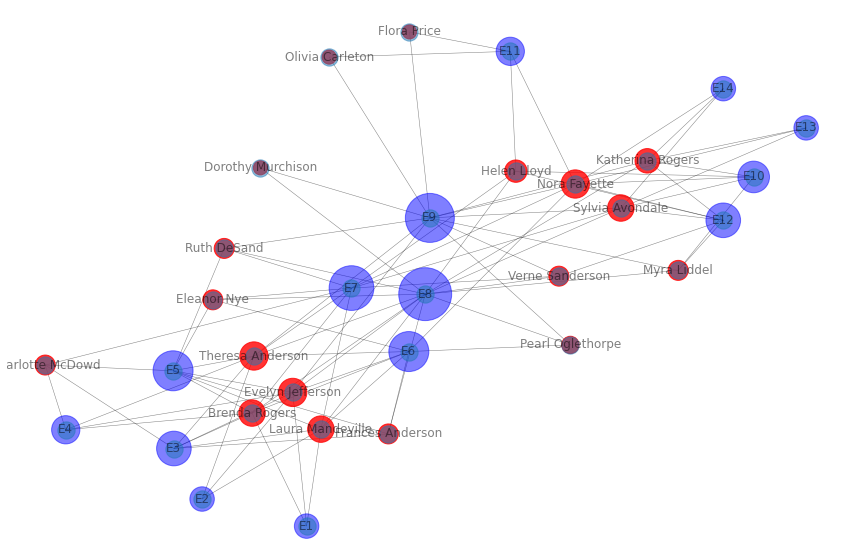

In [169]:
pos=nx.spring_layout(G) # positions for all nodes

# calculate degree centrality
womenDegree = nx.degree(G, women) 
eventsDegree = nx.degree(G, events)

plt.figure(1,figsize=(15,10)) 
plt.axis('off')

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='red',
                       node_size=[v * 100 for v in dict(womenDegree).values()],
                       alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=events,
                       node_color='blue',
                       node_size=[v * 200 for v in dict(eventsDegree).values()],
                       alpha=0.5)

# edges
nx.draw(G,pos,width=.5,alpha=0.5, with_labels=True)

# Centralities and Measurements

Let's calculate the degree and eigenvector centralities for each node.




In [170]:
deg_centralities = nx.degree_centrality(G)
eig_centralities = nx.eigenvector_centrality(G)

degrees = pd.DataFrame.from_dict(deg_centralities, orient='index', columns=['Score'])
eig = pd.DataFrame.from_dict(eig_centralities, orient='index', columns=['Score'])


Here is a view of degree and eigenvector centrality scores by women only (excluding events). These are the top 5 and lowest 5.

**Top 5 Degree Values**

In [171]:
womenNodeDegrees = degrees[degrees.index.isin(women)]
womenNodeDegrees = womenNodeDegrees.sort_values(by='Score', ascending=False)
womenNodeDegrees.head(5)

,Score
Evelyn Jefferson,0.258065
Theresa Anderson,0.258065
Nora Fayette,0.258065
Laura Mandeville,0.225806
Brenda Rogers,0.225806


**Lowest 5 Degree Values**



In [172]:
womenNodeDegrees.tail(5)

,Score
Charlotte McDowd,0.129032
Pearl Oglethorpe,0.096774
Dorothy Murchison,0.064516
Olivia Carleton,0.064516
Flora Price,0.064516


**Top 5 by Eigenvector Score**



In [173]:
womenEigDegrees = eig[eig.index.isin(women)]
womenEigDegrees = womenEigDegrees.sort_values(by='Score', ascending=False)
womenEigDegrees.head(5)

,Score
Theresa Anderson,0.262027
Evelyn Jefferson,0.236692
Brenda Rogers,0.221330
Laura Mandeville,0.218654
Sylvia Avondale,0.195992


**Lowest 5 by Eigenvector Score**


In [174]:
womenEigDegrees.tail(5)

,Score
Pearl Oglethorpe,0.127300
Charlotte McDowd,0.118945
Dorothy Murchison,0.092939
Olivia Carleton,0.049194
Flora Price,0.049194


## Table for Women by Relationships and Events Attended
Next, let's look at a tabulation of the women's relationships and events attended. This uses Payton's code.

In [175]:
womenDegree = nx.degree(G, women) 
eventsDegree = nx.degree(G, events)

womenDegreeDF = pd.DataFrame()
womenDegreeDF['Name'] = dict(womenDegree).keys()
womenDegreeDF['Events'] = dict(womenDegree).values()
womenDegreeDF.sort_values(by='Events', ascending = False)
womenRelationships = pd.DataFrame({'Name': [w for w in women], \
                                'Relationships': [W.degree(w) for w in women]})
womenRelationships = womenRelationships.sort_values(by='Relationships', ascending = False)
womenActivities = womenDegreeDF.merge(womenRelationships)
womenActivities = womenActivities.sort_values(by=['Events', 'Relationships'], ascending = False)

womenActivities

,Name,Events,Relationships
0,Evelyn Jefferson,8,17
2,Theresa Anderson,8,17
13,Nora Fayette,8,17
12,Sylvia Avondale,7,17
1,Laura Mandeville,7,15
3,Brenda Rogers,7,15
11,Katherina Rogers,6,16
14,Helen Lloyd,5,17
8,Ruth DeSand,4,17
9,Verne Sanderson,4,17


# Analysis

It does not look like the number of relationships a woman has correlates to the number of events she attends. For example, if we look at `Ruth DeSand`, she has only attended 4 events, but she has 17 relationships. `Evelyn Jefferson`, `Theresa Anderson`, and `Nora Fayette` have a high number of relationships and attended the most number of events, but we have `Dorothy Murchison` who has 16 relationships but only attended 2 events. So my inference needs to be refined. In addition, I may have made an error because I had not collapsed the bipartites graph.

# Cliques
In this section, I'm going to see if I could identify any cliques within the women because I think that individuals will attend events, sometimes, if certain other friends are going.

In [192]:
# Collapse the bipartites graph with only the women
H = bipartite.projected_graph(G, women)

# Obtain the cliques
cliques = list(nx.find_cliques(H))


Here is a list of cliques.

In [195]:
for clique in cliques:
  print(clique)

['Theresa Anderson', 'Ruth DeSand', 'Sylvia Avondale', 'Verne Sanderson', 'Helen Lloyd', 'Evelyn Jefferson', 'Nora Fayette', 'Pearl Oglethorpe', 'Katherina Rogers', 'Dorothy Murchison', 'Myra Liddel', 'Eleanor Nye', 'Brenda Rogers', 'Frances Anderson', 'Laura Mandeville']
['Theresa Anderson', 'Ruth DeSand', 'Sylvia Avondale', 'Verne Sanderson', 'Helen Lloyd', 'Evelyn Jefferson', 'Nora Fayette', 'Pearl Oglethorpe', 'Katherina Rogers', 'Dorothy Murchison', 'Myra Liddel', 'Flora Price', 'Olivia Carleton']
['Theresa Anderson', 'Ruth DeSand', 'Sylvia Avondale', 'Verne Sanderson', 'Helen Lloyd', 'Evelyn Jefferson', 'Nora Fayette', 'Charlotte McDowd', 'Brenda Rogers', 'Eleanor Nye', 'Frances Anderson', 'Laura Mandeville']


# Conclusion

My inference was not correct as members were able to have a high number of relationships but not attend a high number of events. I suspect more can be discovered. Perhaps the commonality of particular members like `Theresa Anderson`, `Ruth DeSand`, etc across the cliques might denote they are leaders of the club.